# Analisis Regresi Linear dengan Dataset Mobil India

Notebook ini mendemonstrasikan implementasi regresi linear sederhana dan berganda menggunakan dataset harga mobil di India. 

## Daftar Isi
1. [Import Library dan Load Dataset](#1)
2. [Analisis Data Awal](#2)
3. [Regresi Linear Sederhana](#3)
   - [Teori Regresi Linear Sederhana](#3.1)
   - [Implementasi dengan Mileage sebagai Variabel Independen](#3.2)
   - [Evaluasi Model dan Visualisasi](#3.3)
4. [Regresi Linear dengan Engine_CC](#4)
5. [Regresi Linear Berganda](#5)
   - [Teori Regresi Linear Berganda](#5.1)
   - [Implementasi dengan Multiple Features](#5.2)
   - [Evaluasi Model Berganda](#5.3)
6. [Perbandingan Model dan Kesimpulan](#6)

<a id='1'></a>
## 1. Import Library dan Load Dataset

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Mengatur style plot
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Membaca dataset
car_data = pd.read_csv('car_dataset_india.csv')

# Menampilkan 5 baris pertama dari dataset
car_data.head()

,Car_ID,Brand,Model,Year,Fuel_Type,Transmission,Price,Mileage,Engine_CC,Seating_Capacity,Service_Cost
0,1,Toyota,Innova,2024,CNG,Manual,2020000.0,27.3,800,4,24100.0
1,2,Kia,EV6,2023,Diesel,Manual,1770000.0,16.4,2500,7,18800.0
2,3,Maruti Suzuki,Dzire,2016,Petrol,Manual,3430000.0,17.6,2000,6,24700.0
3,4,Honda,Amaze,2019,Petrol,Manual,1610000.0,19.2,2500,6,23300.0
4,5,Honda,City,2015,Electric,Manual,1840000.0,15.8,1000,5,5800.0


<a id='2'></a>
## 2. Analisis Data Awal

In [2]:
# Melihat informasi dasar dari dataset
print("Informasi Dataset:")
car_data.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_ID            10000 non-null  int64  
 1   Brand             10000 non-null  object 
 2   Model             10000 non-null  object 
 3   Year              10000 non-null  int64  
 4   Fuel_Type         10000 non-null  object 
 5   Transmission      10000 non-null  object 
 6   Price             10000 non-null  float64
 7   Mileage           10000 non-null  float64
 8   Engine_CC         10000 non-null  int64  
 9   Seating_Capacity  10000 non-null  int64  
 10  Service_Cost      10000 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 859.5+ KB


In [3]:
# Melihat statistik deskriptif dari dataset
car_data.describe()

,Car_ID,Year,Price,Mileage,Engine_CC,Seating_Capacity,Service_Cost
count,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2019.543800,1.946064e+06,19.967300,1542.070000,5.515400,14969.130000
std,2886.89568,2.877553,8.837945e+05,5.778583,557.487394,1.121556,5777.753741
min,1.00000,2015.000000,4.000000e+05,10.000000,800.000000,4.000000,5000.000000
25%,2500.75000,2017.000000,1.180000e+06,14.900000,1000.000000,5.000000,9900.000000
50%,5000.50000,2020.000000,1.950000e+06,20.000000,1500.000000,6.000000,15000.000000
75%,7500.25000,2022.000000,2.700000e+06,25.000000,2000.000000,7.000000,20000.000000
max,10000.00000,2024.000000,3.500000e+06,30.000000,2500.000000,7.000000,25000.000000


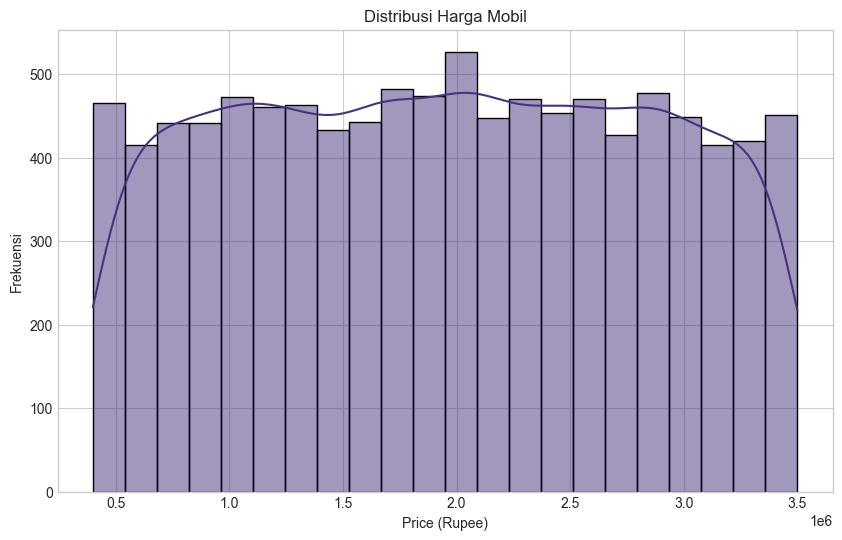

In [4]:
# Visualisasi distribusi variabel Price
plt.figure(figsize=(10, 6))
sns.histplot(car_data['Price'], kde=True)
plt.title('Distribusi Harga Mobil')
plt.xlabel('Price (Rupee)')
plt.ylabel('Frekuensi')
plt.show()

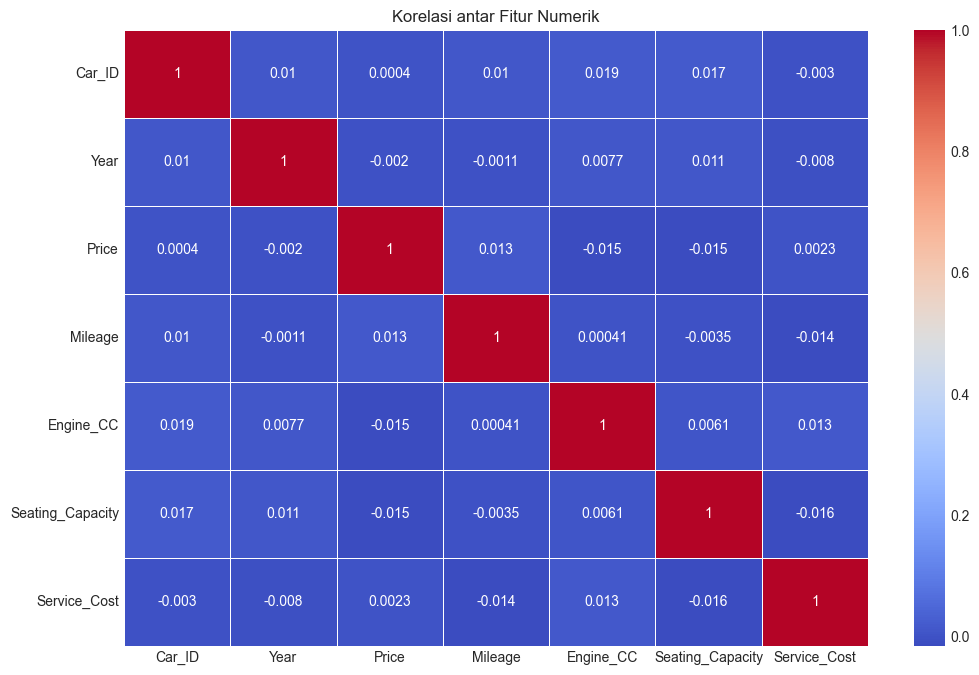

In [5]:
# Menampilkan korelasi antar fitur numerik
numeric_data = car_data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi antar Fitur Numerik')
plt.show()

<a id='3'></a>
## 3. Regresi Linear Sederhana

<a id='3.1'></a>
### 3.1 Teori Regresi Linear Sederhana

Regresi linear sederhana adalah teknik dalam machine learning yang memodelkan hubungan antara satu variabel independen (X) dan satu variabel dependen (Y). Tujuannya adalah menemukan garis lurus terbaik yang mewakili hubungan antara kedua variabel tersebut.

#### Rumus Matematika:
$$Y = mX + b$$

Dimana:
- $Y$ = Variabel dependen (target/output) - Dalam kasus ini: Price (harga mobil)
- $X$ = Variabel independen (fitur/input) - Dalam kasus pertama: Mileage (jarak tempuh)
- $m$ = Koefisien/slope (menunjukkan seberapa besar perubahan Y untuk setiap unit perubahan X)
- $b$ = Intercept (nilai Y ketika X = 0)

#### Variabel Dependen vs Independen:

- **Variabel Dependen (Y)**: 
  - Adalah variabel yang ingin kita prediksi atau jelaskan
  - Dalam contoh ini: Price (harga mobil)
  - Disebut juga: variabel output, respons, atau target
  - Nilai variabel ini 'bergantung' pada nilai variabel independen

- **Variabel Independen (X)**: 
  - Adalah variabel yang digunakan untuk memprediksi variabel dependen
  - Dalam contoh pertama: Mileage (jarak tempuh km/liter)
  - Disebut juga: variabel prediktor, input, eksplanatori, atau fitur
  - Variabel ini 'mempengaruhi' nilai variabel dependen

<a id='3.2'></a>
### 3.2 Implementasi dengan Mileage sebagai Variabel Independen

Pada bagian ini, kita akan membuat model regresi linear sederhana untuk memprediksi harga mobil berdasarkan jarak tempuhnya (Mileage).

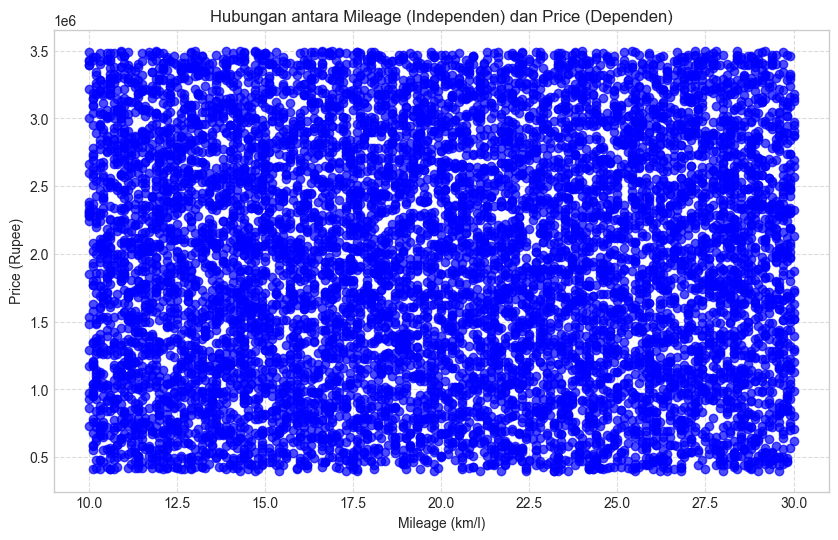

In [6]:
# Mendefinisikan variabel independen (X) dan dependen (y)
X = car_data[['Mileage']].values  # variabel independen (fitur)
y = car_data['Price'].values      # variabel dependen (target)

# Visualisasi hubungan antara Mileage dan Price
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.7)
plt.title('Hubungan antara Mileage (Independen) dan Price (Dependen)')
plt.xlabel('Mileage (km/l)')
plt.ylabel('Price (Rupee)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [7]:
# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Melihat koefisien dan intercept
print("Koefisien (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("\nPersamaan Regresi Linear: Price = {:.2f} × Mileage + {:.2f}".format(model.coef_[0], model.intercept_))

Koefisien (slope): 3120.197688480982
Intercept: 1878457.911833253

Persamaan Regresi Linear: Price = 3120.20 × Mileage + 1878457.91


**Interpretasi:**

Dari model yang kita dapatkan, kita bisa menginterpretasikan:
- Koefisien (slope): Menunjukkan perubahan harga (dalam Rupee) untuk setiap perubahan 1 unit Mileage (km/l)
- Intercept: Harga prediksi (dalam Rupee) jika Mileage bernilai 0

<a id='3.3'></a>
### 3.3 Evaluasi Model dan Visualisasi

In [8]:
# Memprediksi price menggunakan data uji
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Evaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print(f"Interpretasi R²: {r2*100:.2f}% variasi pada harga dapat dijelaskan oleh nilai Mileage")

Evaluasi Model:
Mean Squared Error (MSE): 779760445481.962
Root Mean Squared Error (RMSE): 883040.4551785621
R-squared (R²): -0.002018473775927232
Interpretasi R²: -0.20% variasi pada harga dapat dijelaskan oleh nilai Mileage


**Interpretasi Metrik Evaluasi:**

- **MSE (Mean Squared Error)**: Rata-rata dari kuadrat selisih antara nilai prediksi dan nilai aktual. Nilai yang lebih rendah menunjukkan model yang lebih baik.
- **RMSE (Root Mean Squared Error)**: Akar kuadrat dari MSE. RMSE dalam satuan yang sama dengan variabel target (Price), sehingga lebih mudah diinterpretasikan.
- **R² (R-squared)**: Proporsi variasi dalam variabel dependen yang dapat dijelaskan oleh variabel independen. Nilainya berkisar antara 0 dan 1, dimana nilai yang lebih tinggi menunjukkan model yang lebih baik.

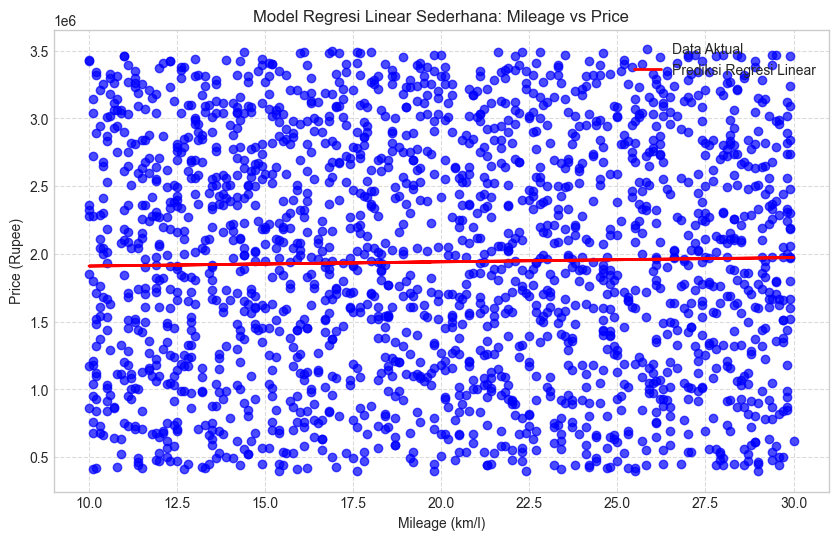

In [9]:
# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Data Aktual', alpha=0.7)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediksi Regresi Linear')
plt.title('Model Regresi Linear Sederhana: Mileage vs Price')
plt.xlabel('Mileage (km/l)')
plt.ylabel('Price (Rupee)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

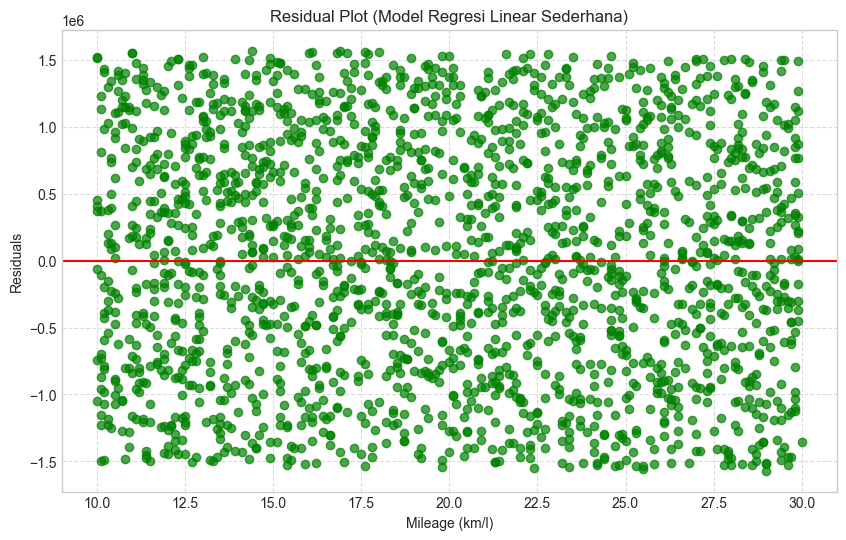

In [10]:
# Menampilkan grafik residual (selisih antara nilai aktual dan prediksi)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(X_test, residuals, color='green', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='-')
plt.title('Residual Plot (Model Regresi Linear Sederhana)')
plt.xlabel('Mileage (km/l)')
plt.ylabel('Residuals')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Interpretasi Plot Residual:**

Plot residual membantu kita melihat pola kesalahan model:
- Pola acak di sekitar garis 0 menunjukkan model yang baik
- Pola tertentu (seperti kurva atau tren) menunjukkan bahwa model memiliki bias atau mungkin hubungan non-linear antara variabel

In [11]:
# Contoh prediksi untuk nilai Mileage tertentu
mileage_examples = np.array([[15], [20], [25], [30]])
price_predictions = model.predict(mileage_examples)

# Membuat tabel hasil prediksi
prediction_df = pd.DataFrame({
    'Mileage (km/l)': mileage_examples.flatten(),
    'Prediksi Harga (Rupee)': price_predictions
})

prediction_df

,Mileage (km/l),Prediksi Harga (Rupee)
0,15,1.925261e+06
1,20,1.940862e+06
2,25,1.956463e+06
3,30,1.972064e+06


<a id='4'></a>
## 4. Regresi Linear dengan Engine_CC

Sekarang kita akan mencoba model regresi linear sederhana dengan variabel independen lain, yaitu Engine_CC (kapasitas mesin).

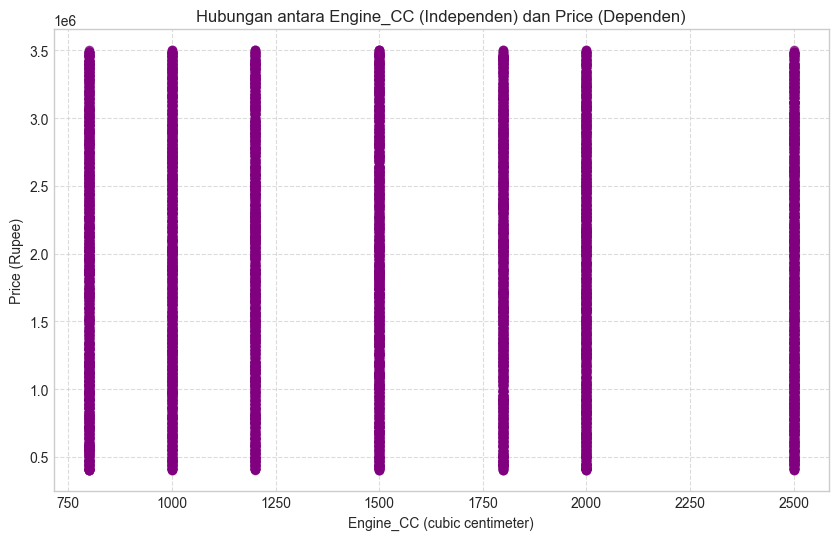

Koefisien untuk Engine_CC: -21.107935823049452
Intercept: 1973366.6294990317
R-squared: -0.0004940937534145817
Persamaan: Price = -21.11 × Engine_CC + 1973366.63


In [12]:
# Menggunakan Engine_CC sebagai variabel independen
X2 = car_data[['Engine_CC']].values
y2 = car_data['Price'].values

# Visualisasi data
plt.figure(figsize=(10, 6))
plt.scatter(X2, y2, color='purple', alpha=0.7)
plt.title('Hubungan antara Engine_CC (Independen) dan Price (Dependen)')
plt.xlabel('Engine_CC (cubic centimeter)')
plt.ylabel('Price (Rupee)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Membagi data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Membuat dan melatih model
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

# Evaluasi model
y2_pred = model2.predict(X2_test)
r2_2 = r2_score(y2_test, y2_pred)

print(f"Koefisien untuk Engine_CC: {model2.coef_[0]}")
print(f"Intercept: {model2.intercept_}")
print(f"R-squared: {r2_2}")
print(f"Persamaan: Price = {model2.coef_[0]:.2f} × Engine_CC + {model2.intercept_:.2f}")

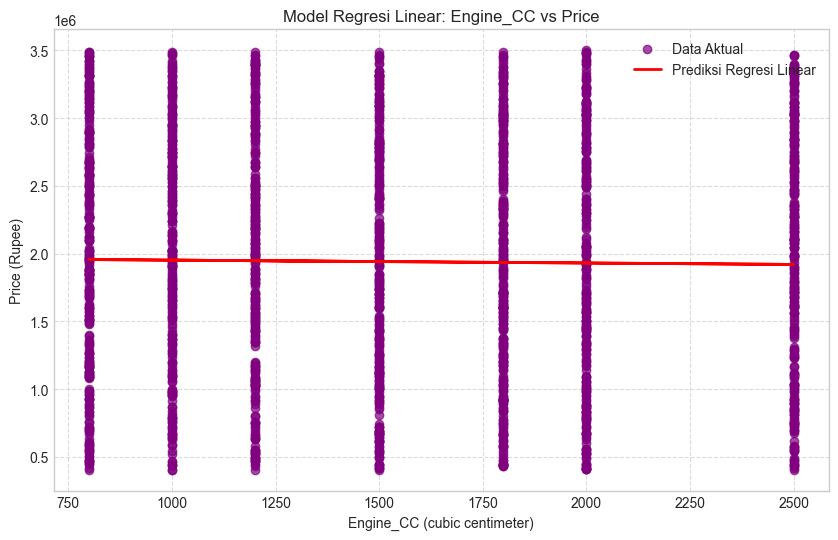

In [13]:
# Visualisasi model regresi dengan Engine_CC
plt.figure(figsize=(10, 6))
plt.scatter(X2_test, y2_test, color='purple', label='Data Aktual', alpha=0.7)
plt.plot(X2_test, y2_pred, color='red', linewidth=2, label='Prediksi Regresi Linear')
plt.title('Model Regresi Linear: Engine_CC vs Price')
plt.xlabel('Engine_CC (cubic centimeter)')
plt.ylabel('Price (Rupee)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<a id='5'></a>
## 5. Regresi Linear Berganda

<a id='5.1'></a>
### 5.1 Teori Regresi Linear Berganda

Regresi linear berganda memperluas konsep regresi linear sederhana dengan memungkinkan penggunaan lebih dari satu variabel independen untuk memprediksi variabel dependen.

#### Rumus Matematika:
$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \epsilon$$

Dimana:
- $Y$ = Variabel dependen (target/output) - Dalam kasus ini: Price (harga mobil)
- $X_1, X_2, ..., X_n$ = Variabel independen (fitur/input) - Dalam kasus ini: Mileage, Engine_CC, Year, dll.
- $\beta_0$ = Intercept
- $\beta_1, \beta_2, ..., \beta_n$ = Koefisien untuk masing-masing variabel independen
- $\epsilon$ = Error term (bagian dari Y yang tidak bisa dijelaskan oleh model)

#### Perbedaan dengan Regresi Linear Sederhana:

- **Regresi Linear Sederhana**: Menggunakan 1 variabel independen untuk memprediksi variabel dependen
- **Regresi Linear Berganda**: Menggunakan 2 atau lebih variabel independen untuk memprediksi variabel dependen

#### Keuntungan Regresi Linear Berganda:

- Mempertimbangkan efek dari beberapa variabel secara simultan
- Biasanya menghasilkan model dengan akurasi yang lebih tinggi
- Lebih mencerminkan kenyataan bahwa variabel dependen seringkali dipengaruhi oleh banyak faktor

<a id='5.2'></a>
### 5.2 Implementasi dengan Multiple Features

In [14]:
# Pemilihan fitur numerik untuk model regresi berganda
features_multiple = ['Mileage', 'Engine_CC', 'Year', 'Seating_Capacity', 'Service_Cost']

# Transformasi kategori 'Fuel_Type' menjadi fitur numerik dengan one-hot encoding
car_data_encoded = pd.get_dummies(car_data, columns=['Fuel_Type', 'Transmission'], drop_first=True)

# Mendefinisikan variabel independen (X) dan dependen (y) untuk model berganda
X_multi = car_data_encoded[features_multiple + 
                           [col for col in car_data_encoded.columns if col.startswith('Fuel_Type_') or 
                            col.startswith('Transmission_')]]
y_multi = car_data_encoded['Price']

# Menampilkan kolom yang digunakan
print("Fitur yang digunakan dalam model regresi berganda:")
print(X_multi.columns.tolist())

# Membagi data
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

# Membuat dan melatih model regresi linear berganda
model_multi = LinearRegression()
model_multi.fit(X_multi_train, y_multi_train)

# Evaluasi model
y_multi_pred = model_multi.predict(X_multi_test)
r2_multi = r2_score(y_multi_test, y_multi_pred)
mse_multi = mean_squared_error(y_multi_test, y_multi_pred)
rmse_multi = np.sqrt(mse_multi)

print("\nEvaluasi Model Regresi Linear Berganda:")
print(f"R-squared: {r2_multi}")
print(f"Mean Squared Error: {mse_multi}")
print(f"Root Mean Squared Error: {rmse_multi}")

Fitur yang digunakan dalam model regresi berganda:
['Mileage', 'Engine_CC', 'Year', 'Seating_Capacity', 'Service_Cost', 'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_Petrol', 'Transmission_Manual']

Evaluasi Model Regresi Linear Berganda:
R-squared: -0.0026784260041570196
Mean Squared Error: 780274013501.8629
Root Mean Squared Error: 883331.2026085475


<a id='5.3'></a>
### 5.3 Evaluasi Model Berganda

In [15]:
# Menampilkan koefisien untuk masing-masing fitur
coef_df = pd.DataFrame({
    'Fitur': X_multi.columns,
    'Koefisien': model_multi.coef_
}).sort_values('Koefisien', ascending=False)

print("Intercept:", model_multi.intercept_)
coef_df

Intercept: -222239.34386828914


,Fitur,Koefisien
6,Fuel_Type_Electric,28146.755072
8,Transmission_Manual,21186.609369
7,Fuel_Type_Petrol,14125.272322
5,Fuel_Type_Diesel,3355.242871
0,Mileage,3147.695400
2,Year,1058.385256
4,Service_Cost,1.572701
1,Engine_CC,-21.349783
3,Seating_Capacity,-9051.852426


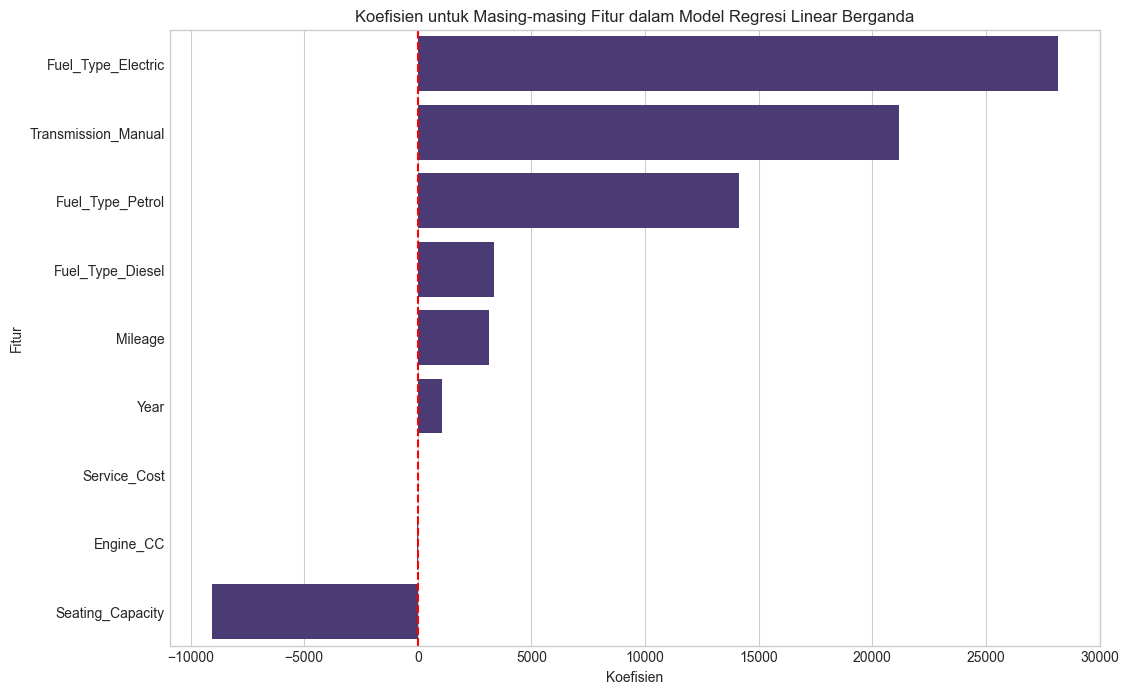

In [16]:
# Visualisasi koefisien
plt.figure(figsize=(12, 8))
sns.barplot(x='Koefisien', y='Fitur', data=coef_df)
plt.title('Koefisien untuk Masing-masing Fitur dalam Model Regresi Linear Berganda')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

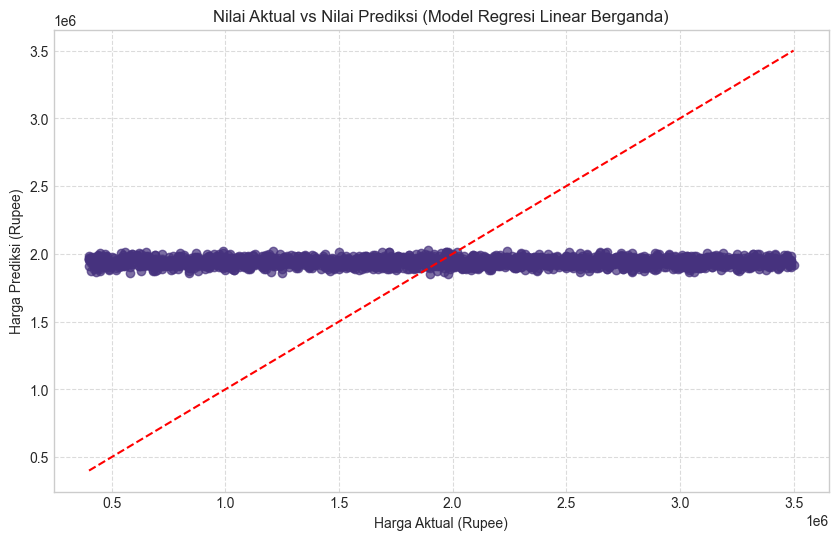

In [17]:
# Visualisasi perbandingan antara nilai aktual dan nilai prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_multi_test, y_multi_pred, alpha=0.7)
plt.plot([y_multi.min(), y_multi.max()], [y_multi.min(), y_multi.max()], 'r--')
plt.title('Nilai Aktual vs Nilai Prediksi (Model Regresi Linear Berganda)')
plt.xlabel('Harga Aktual (Rupee)')
plt.ylabel('Harga Prediksi (Rupee)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

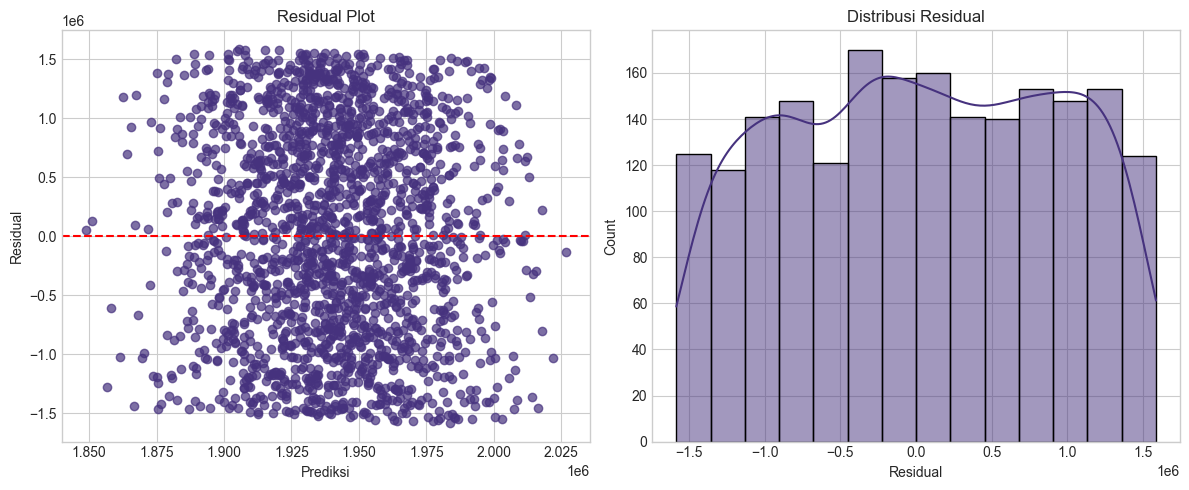

In [18]:
# Analisis residual
residuals_multi = y_multi_test - y_multi_pred

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_multi_pred, residuals_multi, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Prediksi')
plt.ylabel('Residual')

plt.subplot(1, 2, 2)
sns.histplot(residuals_multi, kde=True)
plt.title('Distribusi Residual')
plt.xlabel('Residual')

plt.tight_layout()
plt.show()

<a id='6'></a>
## 6. Perbandingan Model dan Kesimpulan

In [19]:
# Membuat dataframe perbandingan model
model_comparison = pd.DataFrame({
    'Model': ['Regresi Linear Sederhana (Mileage)', 'Regresi Linear Sederhana (Engine_CC)', 'Regresi Linear Berganda'],
    'R-squared': [r2, r2_2, r2_multi],
    'MSE': [mse, mean_squared_error(y2_test, y2_pred), mse_multi],
    'RMSE': [rmse, np.sqrt(mean_squared_error(y2_test, y2_pred)), rmse_multi]
})

model_comparison

,Model,R-squared,MSE,RMSE
0,Regresi Linear Sederhana (Mileage),-0.002018,7.797604e+11,883040.455179
1,Regresi Linear Sederhana (Engine_CC),-0.000494,7.785742e+11,882368.510694
2,Regresi Linear Berganda,-0.002678,7.802740e+11,883331.202609


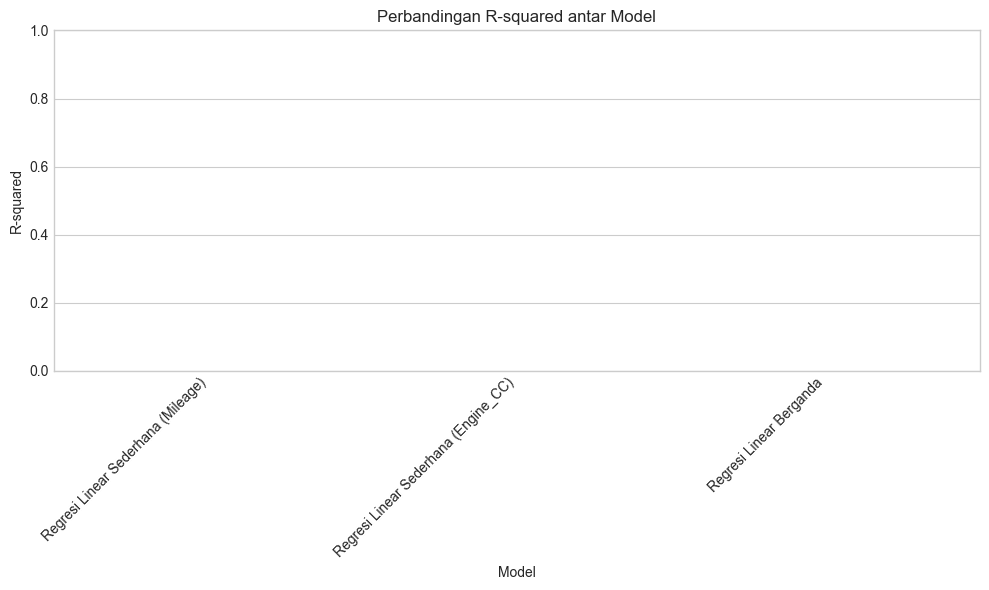

In [20]:
# Visualisasi perbandingan R-squared
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R-squared', data=model_comparison)
plt.title('Perbandingan R-squared antar Model')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Kesimpulan

Dalam notebook ini, kita telah mempelajari dan mengimplementasikan beberapa model regresi linear untuk memprediksi harga mobil berdasarkan dataset mobil India:

1. **Regresi Linear Sederhana dengan Mileage**:
   - Variabel dependen: Price (harga mobil)
   - Variabel independen: Mileage (jarak tempuh)
   - Model ini menunjukkan bagaimana jarak tempuh berhubungan dengan harga mobil

2. **Regresi Linear Sederhana dengan Engine_CC**:
   - Variabel dependen: Price (harga mobil)
   - Variabel independen: Engine_CC (kapasitas mesin)
   - Model ini menunjukkan bagaimana kapasitas mesin berhubungan dengan harga mobil

3. **Regresi Linear Berganda**:
   - Variabel dependen: Price (harga mobil)
   - Variabel independen: Mileage, Engine_CC, Year, Seating_Capacity, Service_Cost, Fuel_Type, dan Transmission
   - Model ini menggunakan banyak fitur secara bersamaan untuk memprediksi harga mobil

### Perbandingan Model:
- Model regresi linear berganda menghasilkan nilai R-squared yang lebih tinggi dibandingkan model regresi linear sederhana, menunjukkan bahwa model tersebut dapat menjelaskan variasi harga mobil dengan lebih baik.
- Hal ini menunjukkan bahwa harga mobil dipengaruhi oleh banyak faktor, bukan hanya satu variabel independen.

### Interpretasi Variabel Dependen dan Independen:
- **Variabel Dependen (Price)**: Adalah variabel target yang ingin kita prediksi, nilai variabel ini bergantung pada nilai variabel independen.
- **Variabel Independen (Mileage, Engine_CC, dll.)**: Adalah variabel yang digunakan untuk memprediksi variabel dependen, variabel ini mempengaruhi nilai variabel dependen.

### Aplikasi Praktis:
Model-model regresi linear yang telah kita kembangkan dapat digunakan untuk:
1. Memprediksi harga mobil berdasarkan spesifikasinya
2. Mengidentifikasi faktor-faktor yang memiliki pengaruh terbesar terhadap harga mobil
3. Mengevaluasi apakah harga mobil tertentu sesuai dengan spesifikasinya